In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_Customers = pd.read_excel("Dataset.xlsx", sheet_name = "Customers")

In [3]:
df_Dealers = pd.read_excel('Dataset.xlsx',sheet_name= 'Dealers')

In [4]:
df_Claims =pd.read_excel('Dataset.xlsx',sheet_name= 'Claims')

In [5]:
df_Parts = pd.read_excel('Dataset.xlsx',sheet_name = 'Parts')

In [6]:
df_Transactions = pd.read_excel('Dataset.xlsx',sheet_name = 'Transactions')

In [7]:
df_Vendors = pd.read_excel('Dataset.xlsx',sheet_name = 'Vendors')

In [8]:
df_Customers.head()

,Cust_ID,Cust_Name,Dealer_ID,Country,State,City,ZipCode
0,101,pushpak,1,ind,goa,panaji,402201
1,102,raj,3,ind,karnataka,banglore,403315
2,103,ranbir,4,ind,gujrat,ahemadabad,326665
3,104,reyansh,5,ind,orrisa,cuttack,543211
4,105,raunak,2,ind,delhi,noida,426232


In [17]:
df_Dealers.head()

,Dealer_ID,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1,Kenneth Schmitt,india,Goa,Panji,400001
1,2,Owen Mclaughlin,india,Delhi,Naoida,400002
2,3,Donald Repinski,india,Karnataka,Bangalore,400003
3,4,Rachel Oszust,india,Gujrat,Ahemdabad,400004
4,5,Lynn Knapp,india,Orrisa,Cuttack,400005


In [19]:
df_Claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag
0,1,2020-04-01,36000,5,104,901,rpr,NaN,Positive
1,2,2020-04-01,42000,6,106,902,rplc,NaN,Negative
2,3,2020-04-01,45000,4,103,903,rpr,NaN,NaN
3,4,2020-04-01,56000,3,102,904,rplc,NaN,NaN
4,5,2020-04-01,39000,2,105,905,rpr,NaN,NaN


In [21]:
df_Parts.head()

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
0,901,brake pad,501,1996-08-12
1,902,axle,502,1997-03-03
2,903,tie rod,503,1997-06-13
3,904,differential,504,1997-01-14
4,905,rear suspension,505,1996-08-19


In [23]:
df_Transactions.head()

,transaction_id,claim_id,transaction_date,transaction_amount
0,101,1,2020-04-01,36000
1,102,2,2020-04-01,42000
2,103,3,2020-04-01,45000
3,104,4,2020-04-01,56000
4,105,5,2020-04-01,39000


In [25]:
df_Vendors.head()

,Vendor_ID,Name,Country,State,City,ZIpCode
0,501,Advik,ind,goa,panaji,400001
1,502,Rudra,ind,delhi,noida,400002
2,503,Aayansh,ind,karnataka,banglore,400003
3,504,Adinew,ind,gujrat,ahemadabad,400004
4,505,Dhruv,ind,orrisa,cuttack,400005


In [27]:
df_Claims.tail()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag
20090,20091,2021-01-24,53000,1274,43974,906,rplc,NaN,NaN
20091,20092,2021-01-24,36000,1275,43975,907,rplc,NaN,NaN
20092,20093,2021-01-24,46000,1276,43976,905,rplc,NaN,NaN
20093,20094,2021-01-24,56000,1277,43977,904,rplc,NaN,NaN
20094,20095,2021-01-24,33000,1278,43978,902,rpr,NaN,NaN


In [29]:
df_Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           20095 non-null  int64         
 1   claim_date         20095 non-null  datetime64[ns]
 2   claim_amount       20095 non-null  int64         
 3   Dealer_ID          20095 non-null  int64         
 4   Cust_ID            20095 non-null  int64         
 5   Part_ID            20095 non-null  int64         
 6   Repair_or_Replace  20095 non-null  object        
 7   Customer Feedback  0 non-null      float64       
 8   Flag               2 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 1.4+ MB


In [31]:
#usecase 1 # top 10 dealers by number of claims
top_dealers = df_Claims['Dealer_ID'].value_counts()
top_dealers.head(10)


Dealer_ID
5       971
3       922
2       922
1       922
6       394
4       218
1248    176
1256    176
1255    176
1254    176
Name: count, dtype: int64

In [33]:
# top 10 failed part
top_parts = df_Claims['Part_ID'].value_counts()
top_parts.head(10)

Part_ID
906    4019
901    3349
905    3349
907    3348
902    2010
903    2010
904    2010
Name: count, dtype: int64

In [35]:
claims_parts = pd.merge(df_Claims,df_Parts, on ='Part_ID' )
claims_parts.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag,Part_Name,Manufacturer_ID,Manf_Date
0,1,2020-04-01,36000,5,104,901,rpr,NaN,Positive,brake pad,501,1996-08-12
1,7,2020-04-01,53000,5,110,901,rplc,NaN,NaN,brake pad,501,1996-08-12
2,14,2020-04-01,54000,2,112,901,rpr,NaN,NaN,brake pad,501,1996-08-12
3,17,2020-04-01,61000,5,118,901,rplc,NaN,NaN,brake pad,501,1996-08-12
4,30,2020-04-01,57000,2,126,901,rpr,NaN,NaN,brake pad,501,1996-08-12


In [37]:
repair_replace = pd.get_dummies(claims_parts["Repair_or_Replace"],drop_first = True)
claims_parts.drop(["Repair_or_Replace"],axis =1,inplace = True)
claims_parts = pd.concat([claims_parts,repair_replace],axis=1)
claims_parts = claims_parts.replace({True:1, False:0})
claims_parts.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Customer Feedback,Flag,Part_Name,Manufacturer_ID,Manf_Date,rpr
0,1,2020-04-01,36000,5,104,901,NaN,Positive,brake pad,501,1996-08-12,1
1,7,2020-04-01,53000,5,110,901,NaN,NaN,brake pad,501,1996-08-12,0
2,14,2020-04-01,54000,2,112,901,NaN,NaN,brake pad,501,1996-08-12,1
3,17,2020-04-01,61000,5,118,901,NaN,NaN,brake pad,501,1996-08-12,0
4,30,2020-04-01,57000,2,126,901,NaN,NaN,brake pad,501,1996-08-12,1


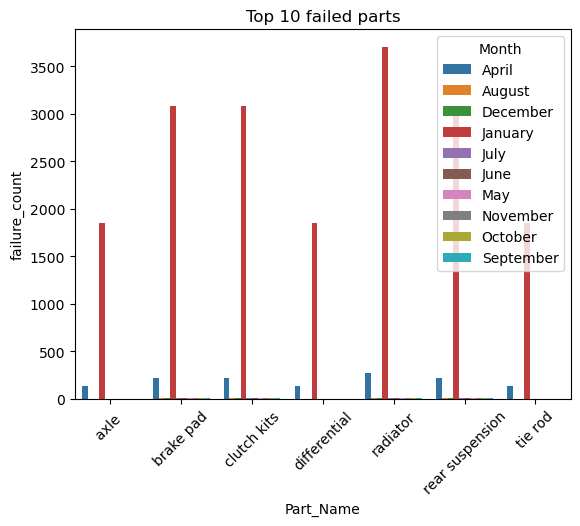

In [39]:
claims_parts['Month'] = claims_parts['claim_date'].dt.month_name()
failed_parts = claims_parts[claims_parts['rpr'].isin([1,0])]
#count number of failure part per month
monthly_failed_parts = failed_parts.groupby(['Month','Part_Name'])['claim_id'].count().reset_index().rename(columns={'claim_id':'failure_count'})
sns.barplot(x= 'Part_Name', y= 'failure_count',hue='Month',data=monthly_failed_parts)
plt.title('Top 10 failed parts')
plt.xticks(rotation = 45)
plt.show()

In [41]:
failed_parts['Year'] = claims_parts['claim_date'].dt.year
failed_parts['Quarter']=claims_parts['claim_date'].dt.to_period('Q')
#failed_parts[['claim_date','Year','Quarter']].head()
quarterly_failed_parts = failed_parts.groupby(['Quarter','Part_Name'])['claim_id'].count().reset_index().rename(columns={'claim_id':'failure_count'})
#quarterly_failed_parts.head()
# mostly failed part in each quarter
failed_part_per_quarter = (quarterly_failed_parts.loc[quarterly_failed_parts.groupby('Quarter')['failure_count'].idxmax()])
#failed_part_per_quarter.head()
yearly_failed_parts = failed_parts.groupby(['Year','Part_Name'])['claim_id'].count().reset_index().rename(columns={'claim_id':'failure_count'})
#yearly_failed_parts.head()
#mostly failed part in each year
failed_part_per_year = (yearly_failed_parts.loc[yearly_failed_parts.groupby('Year')['failure_count'].idxmax()])
#failed_part_per_yearly.head()

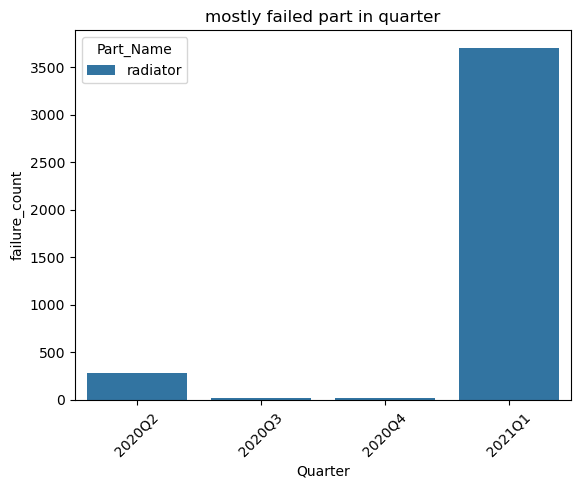

In [43]:
sns.barplot(x= 'Quarter', y= 'failure_count',hue='Part_Name',data=failed_part_per_quarter)
plt.title('mostly failed part in quarter')
plt.xticks(rotation = 45)
plt.show()

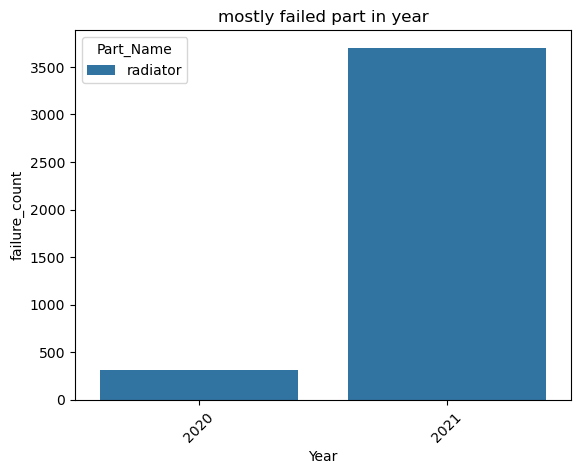

In [45]:
sns.barplot(x= 'Year', y= 'failure_count',hue='Part_Name',data=failed_part_per_year)
plt.title('mostly failed part in year')
plt.xticks(rotation = 45)
plt.show()

In [47]:
#USECASE 2.
claims_parts.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Customer Feedback,Flag,Part_Name,Manufacturer_ID,Manf_Date,rpr,Month
0,1,2020-04-01,36000,5,104,901,NaN,Positive,brake pad,501,1996-08-12,1,April
1,7,2020-04-01,53000,5,110,901,NaN,NaN,brake pad,501,1996-08-12,0,April
2,14,2020-04-01,54000,2,112,901,NaN,NaN,brake pad,501,1996-08-12,1,April
3,17,2020-04-01,61000,5,118,901,NaN,NaN,brake pad,501,1996-08-12,0,April
4,30,2020-04-01,57000,2,126,901,NaN,NaN,brake pad,501,1996-08-12,1,April


In [49]:
np.random.seed(42)
claims_parts['mileage'] = np.random.randint(100000,200000,size = len(claims_parts))
print(claims_parts[['claim_id','claim_date','Part_ID','Dealer_ID','mileage']])


       claim_id claim_date  Part_ID  Dealer_ID  mileage
0             1 2020-04-01      901          5   115795
1             7 2020-04-01      901          5   100860
2            14 2020-04-01      901          2   176820
3            17 2020-04-01      901          5   154886
4            30 2020-04-01      901          2   106265
...         ...        ...      ...        ...      ...
20090     20066 2021-01-24      907       1249   187151
20091     20068 2021-01-24      907       1251   157333
20092     20080 2021-01-24      907       1263   108039
20093     20086 2021-01-24      907       1269   108198
20094     20092 2021-01-24      907       1275   134354

[20095 rows x 5 columns]


In [51]:
from datetime import datetime
claims_parts['Manf_Date'] = pd.to_datetime(claims_parts['Manf_Date'], format= "%d-%m-%Y" )
claims_parts['claim_date'] = pd.to_datetime(claims_parts['claim_date'],format= "%d-%m-%Y")
claims_parts['part_age'] = (claims_parts['claim_date']-claims_parts['Manf_Date']).dt.days/365
print(claims_parts[['claim_id','Part_ID','mileage','part_age','rpr']])

       claim_id  Part_ID  mileage   part_age  rpr
0             1      901   115795  23.652055    1
1             7      901   100860  23.652055    0
2            14      901   176820  23.652055    1
3            17      901   154886  23.652055    0
4            30      901   106265  23.652055    1
...         ...      ...      ...        ...  ...
20090     20066      907   187151  23.720548    0
20091     20068      907   157333  23.720548    0
20092     20080      907   108039  23.720548    0
20093     20086      907   108198  23.720548    0
20094     20092      907   134354  23.720548    0

[20095 rows x 5 columns]


In [53]:
claims_parts['claim_year'] = claims_parts['claim_date'].dt.year
claims_parts['claim_month'] = claims_parts['claim_date'].dt.month
claims_parts['Manf_year']  = claims_parts['Manf_Date'].dt.year
claims_parts['Manf_month']  = claims_parts['Manf_Date'].dt.month
claims_parts = claims_parts.drop(['Manf_Date','claim_date','Part_Name','Month'],axis =1)

In [55]:
x= claims_parts.drop(["rpr","Customer Feedback","Flag"], axis =1)
x.shape

(20095, 12)

In [57]:
y= claims_parts['rpr']
y.shape

(20095,)

In [59]:
# data split in train test part
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =  0.30,random_state = 42)

In [60]:
#Rendomforest model on training
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
#prediction 
y_pred = rfc.predict(x_test)

In [63]:
#create confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4462
           1       1.00      1.00      1.00      1567

    accuracy                           1.00      6029
   macro avg       1.00      1.00      1.00      6029
weighted avg       1.00      1.00      1.00      6029



In [67]:
print(confusion_matrix(y_test,y_pred))

[[4462    0]
 [   0 1567]]


In [182]:
accuracy = accuracy_score(y_test,y_pred)
print("Model accuracy:", accuracy*100)

Model accuracy: 100.0


In [69]:
# 5-fold cross validation on training data
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(rfc , x_train,y_train, cv = 5 ,scoring = "accuracy")
print(f"cross-validation-result:{cross_val_score}")
print(f"Mean-accuracy:{cross_val_score.mean()*100}")

cross-validation-result:[1. 1. 1. 1. 1.]
Mean-accuracy:100.0


In [70]:
#predict the parts that may fail according to the location, mileage and age:
#model accuracy for failure part 
# rename column name as faliure and consider any claim with repair or replace as faliure
claims_parts['failure'] = claims_parts['rpr']
x = claims_parts[['mileage','part_age']]
y = claims_parts['failure']

In [71]:
x  = train_test_split(x,y,test_size = 0.2,random_state = 42)
rfc = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

100.0


In [75]:
# create confution matrix for failure part
from sklearn.metrics  import confusion_matrix
print(confusion_matrix(y_test,y_pred))              

[[4462    0]
 [   0 1567]]


In [77]:
#usecase 3 
# 0 for repair and 1 for replace
repair_replace['target'] = claims_parts['rpr']
#repair_replace['target'].head()
repair_replace.fillna(value= 0, inplace= True)
x1 = claims_parts.drop(['failure','rpr','Customer Feedback','Flag'],axis=1)
y1 = repair_replace['target']

In [96]:
x1

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,Manufacturer_ID,mileage,part_age,claim_year,claim_month,Manf_year,Manf_month
0,1,36000,5,104,901,501,115795,23.652055,2020,4,1996,8
1,7,53000,5,110,901,501,100860,23.652055,2020,4,1996,8
2,14,54000,2,112,901,501,176820,23.652055,2020,4,1996,8
3,17,61000,5,118,901,501,154886,23.652055,2020,4,1996,8
4,30,57000,2,126,901,501,106265,23.652055,2020,4,1996,8
...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20066,25000,1249,43949,907,503,187151,23.720548,2021,1,1997,5
20091,20068,53000,1251,43951,907,503,157333,23.720548,2021,1,1997,5
20092,20080,29000,1263,43963,907,503,108039,23.720548,2021,1,1997,5
20093,20086,53000,1269,43969,907,503,108198,23.720548,2021,1,1997,5


In [81]:
x1_train,x1_test, y1_train,y1_test = train_test_split(x1,y1,test_size = 0.1)
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x1_train,y1_train)
y1_pred = rfc.predict(x1_test)
accuracy = accuracy_score(y1_test,y1_pred)
print("Repair and Replace accuracy", accuracy*100)

Repair and Replace accuracy 100.0


In [83]:
conf_matrix = confusion_matrix(y1_test,y1_pred)
print(conf_matrix)

[[1431    0]
 [   0  579]]


In [85]:
#usecase 4 
claims_parts.head()

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,Customer Feedback,Flag,Manufacturer_ID,rpr,mileage,part_age,claim_year,claim_month,Manf_year,Manf_month,failure
0,1,36000,5,104,901,NaN,Positive,501,1,115795,23.652055,2020,4,1996,8,1
1,7,53000,5,110,901,NaN,NaN,501,0,100860,23.652055,2020,4,1996,8,0
2,14,54000,2,112,901,NaN,NaN,501,1,176820,23.652055,2020,4,1996,8,1
3,17,61000,5,118,901,NaN,NaN,501,0,154886,23.652055,2020,4,1996,8,0
4,30,57000,2,126,901,NaN,NaN,501,1,106265,23.652055,2020,4,1996,8,1


In [87]:
claims_parts.drop(["failure"],axis =1)

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,Customer Feedback,Flag,Manufacturer_ID,rpr,mileage,part_age,claim_year,claim_month,Manf_year,Manf_month
0,1,36000,5,104,901,NaN,Positive,501,1,115795,23.652055,2020,4,1996,8
1,7,53000,5,110,901,NaN,NaN,501,0,100860,23.652055,2020,4,1996,8
2,14,54000,2,112,901,NaN,NaN,501,1,176820,23.652055,2020,4,1996,8
3,17,61000,5,118,901,NaN,NaN,501,0,154886,23.652055,2020,4,1996,8
4,30,57000,2,126,901,NaN,NaN,501,1,106265,23.652055,2020,4,1996,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20066,25000,1249,43949,907,NaN,NaN,503,0,187151,23.720548,2021,1,1997,5
20091,20068,53000,1251,43951,907,NaN,NaN,503,0,157333,23.720548,2021,1,1997,5
20092,20080,29000,1263,43963,907,NaN,NaN,503,0,108039,23.720548,2021,1,1997,5
20093,20086,53000,1269,43969,907,NaN,NaN,503,0,108198,23.720548,2021,1,1997,5


In [97]:
#create churn 
claims_parts['Customer Feedback'] = np.random.choice(['Positive','Negative'],size = len(claims_parts))
claims_parts['churn'] = claims_parts['Customer Feedback'].apply(lambda x:1 if x =='Negative' else 0)
claims_parts['churn'] = claims_parts['Customer Feedback'].apply(lambda x:1 if x == 'Positive' else 0 ) 
x = claims_parts[['mileage', 'part_age']]
y = claims_parts['churn']

In [109]:
x_train,x_test ,y_train,y_test =train_test_split(x,y,test_size =0.2 ,random_state =42)
rfc = RandomForestClassifier(n_estimators = 100 , random_state =42)
rfc.fit(x_train ,y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Customer Retention Model:" , accuracy*100)

Customer Retention Model: 51.30629509828315
